In [91]:
import numpy as np
def init_weights(n):
    return np.random.randn(n, 1)

def shuffle_data(x,y):
    perm = np.random.permutation(x.shape[0])
    return x[perm], y[perm]

def generate_batches(x,y,start,batch_size):
    if start+batch_size>x.shape[0]:
        batch_size = x.shape[0] - start
    x_batch, y_batch = x[start: start+batch_size], y[start: start+batch_size]
    return x_batch, y_batch

In [92]:
def calculate_loss(x_batch, y_batch, weights):
    P = np.dot(x_batch, weights)
    loss = np.mean(np.power(y_batch-P, 2))

    return loss

In [93]:
def calculate_gradient(x_batch, y_batch, weights):
    P = np.dot(x_batch, weights)
    return np.dot(np.transpose(x_batch, (1,0)), (y_batch-P))

In [94]:
def train(x, y, lr=0.01, iter=1000, seed=1, batch_size=100):
    start = 0
    losses = []
    if seed:
        np.random.seed(seed)
    weights = init_weights(x.shape[1])
    for i in range(iter):
        if start>=x.shape[0]:
            start = 0
            x, y = shuffle_data(x,y)
        x_batch, y_batch = generate_batches(x,y,start,batch_size)
        start+=batch_size

        loss = calculate_loss(x_batch,y_batch, weights)
        losses.append(loss)
        gradient = calculate_gradient(x_batch, y_batch, weights)
        weights -= lr*gradient 
    return losses, weights


Data Preparation

In [95]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
target = boston.target
features = boston.feature_names
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), 1)
X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), 1)

print(X_train.shape)
print(X_test.shape)

(354, 14)
(152, 14)


/Users/hemanth/opt/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

In [96]:
train_results = train(X_train, y_train, lr=0.001, iter=900, seed=180780, batch_size=23)
losses = train_results[0]
weights = train_results[1]

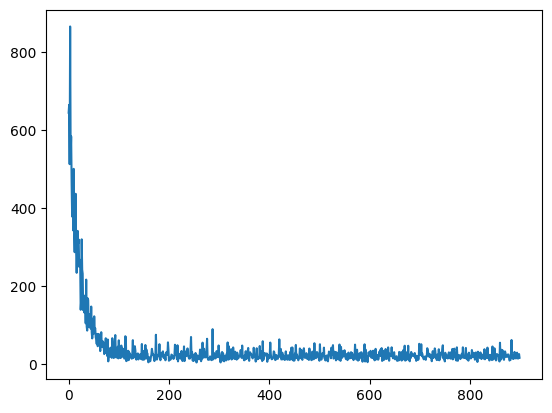

In [97]:
import matplotlib.pyplot as plt
plt.plot(list(range(900)), losses)